In [56]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [2]:
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("pitch_movement_4S.csv")

print(df.shape)
print(df.keys())
df.head()

(409, 24)
Index(['year', 'last_name', ' first_name', 'pitcher_id', 'team_name',
       'team_name_abbrev', 'pitch_hand', 'avg_speed', 'pitches_thrown',
       'total_pitches', 'pitches_per_game', 'pitch_per', 'pitch_type',
       'pitch_type_name', 'pitcher_break_z', 'league_break_z', 'diff_z',
       'rise', 'pitcher_break_x', 'league_break_x', 'diff_x', 'tail',
       'percent_rank_diff_z', 'percent_rank_diff_x'],
      dtype='object')


,year,last_name,first_name,pitcher_id,team_name,team_name_abbrev,pitch_hand,avg_speed,pitches_thrown,total_pitches,...,pitcher_break_z,league_break_z,diff_z,rise,pitcher_break_x,league_break_x,diff_x,tail,percent_rank_diff_z,percent_rank_diff_x
0,2022,Rodón,Carlos,607074,Giants,SF,L,95.5,1749,2985,...,12.0,-13.0,0.9,7,5.9,-6.2,-0.2,-4,0.683824,0.406863
1,2022,Cole,Gerrit,543037,Yankees,NYY,R,97.8,1698,3274,...,10.5,-12.9,2.4,19,10.4,-8.1,2.3,28,0.950980,0.727941
2,2022,Gilbert,Logan,669302,Mariners,SEA,R,96.1,1625,3015,...,11.9,-12.7,0.8,6,6.4,-6.7,-0.3,-5,0.659314,0.399510
3,2022,Pivetta,Nick,601713,Red Sox,BOS,R,93.4,1572,3082,...,10.9,-13.7,2.8,21,5.1,-5.6,-0.6,-10,0.973039,0.367647
4,2022,McKenzie,Triston,663474,Guardians,CLE,R,92.5,1565,2807,...,11.6,-14.4,2.9,20,3.0,-5.7,-2.6,-47,0.977941,0.198529


In [ ]:
del df['year']
del df['team_name']
del df['pitches_per_game']
del df['pitch_per']
del df['league_break_z']
del df['diff_z']
del df['rise']
del df['league_break_x']
del df['diff_x']
del df['tail']
del df['percent_rank_diff_z']
del df['percent_rank_diff_x']

In [18]:
df.head()
print(df.keys())

Index(['last_name', ' first_name', 'pitcher_id', 'team_name_abbrev',
       'pitch_hand', 'avg_speed', 'pitches_thrown', 'total_pitches',
       'pitch_type', 'pitch_type_name', 'pitcher_break_z', 'pitcher_break_x',
       'percent_rank_diff_x'],
      dtype='object')


In [24]:
df["name"] = df[" first_name"].str.cat(df["last_name"], sep=" ")

In [32]:
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('name')))
df = df.reindex(columns= cols)

In [38]:
del df['percent_rank_diff_x']

In [48]:
df.rename(columns={'pitcher_break_z':'vertical_break','pitcher_break_x':'horizonal_break','team_name_abbrev':'team_name'},inplace=True)

In [76]:
df.to_csv('fourseam_data.csv', index=False)

# EDA

In [49]:
df.describe()

,pitcher_id,avg_speed,pitches_thrown,total_pitches,vertical_break,horizonal_break
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,618263.356968,93.856968,511.706601,1347.511002,15.511247,7.602200
std,58266.483819,2.334871,329.185793,735.340221,3.618034,3.294577
min,425794.000000,83.200000,44.000000,488.000000,8.200000,0.500000
25%,595345.000000,92.500000,286.000000,796.000000,13.400000,5.300000
50%,641401.000000,93.900000,437.000000,1035.000000,15.100000,7.500000
75%,663776.000000,95.400000,685.000000,1843.000000,17.100000,10.200000
max,689225.000000,100.800000,1749.000000,3274.000000,53.200000,17.400000


In [47]:
512/1348

#In 2022, MLB pitchers threw 38% four seam fastball in average

0.3798219584569733

In [61]:
df.corr()

,pitcher_id,avg_speed,pitches_thrown,total_pitches,vertical_break,horizonal_break
pitcher_id,1.000000,0.187275,-0.041178,-0.174037,-0.064516,0.070898
avg_speed,0.187275,1.000000,0.046004,-0.103137,-0.612023,0.138935
pitches_thrown,-0.041178,0.046004,1.000000,0.759266,-0.225083,-0.103944
total_pitches,-0.174037,-0.103137,0.759266,1.000000,-0.028491,-0.093590
vertical_break,-0.064516,-0.612023,-0.225083,-0.028491,1.000000,0.125240
horizonal_break,0.070898,0.138935,-0.103944,-0.093590,0.125240,1.000000


<AxesSubplot:>

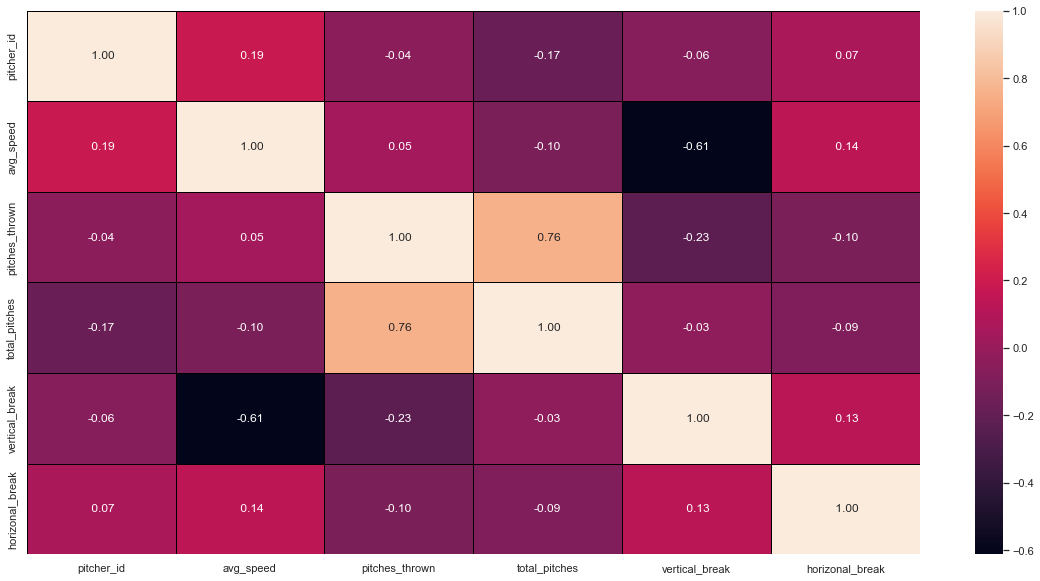

In [62]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )

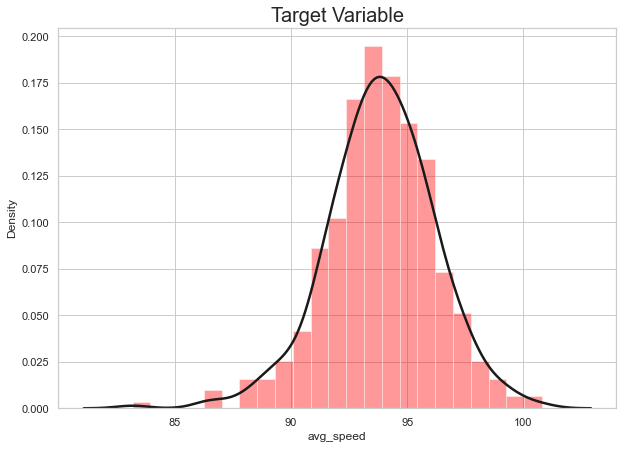

In [57]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(df['avg_speed'], color='red',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Target Variable', fontsize=20)
plt.show()

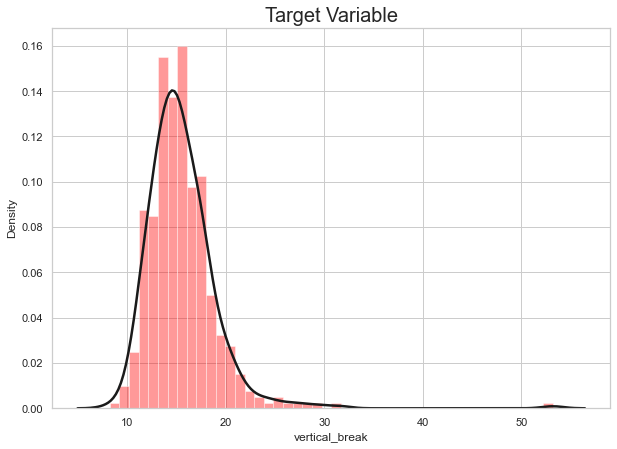

In [58]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(df['vertical_break'], color='red',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Target Variable', fontsize=20)
plt.show()

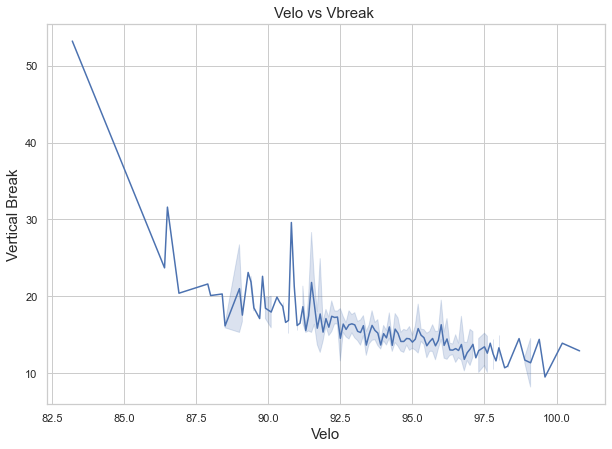

In [60]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='avg_speed', y='vertical_break')
plt.title('Velo vs Vbreak ', fontsize=15)
plt.xlabel('Velo', fontsize=15)
plt.ylabel('Vertical Break',fontsize=15)
plt.show()

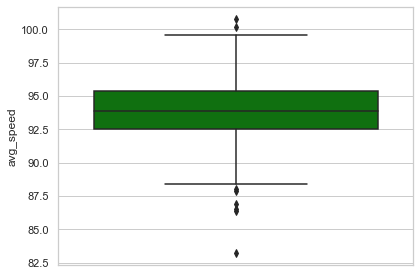

In [73]:
sns.boxplot(y=df['avg_speed'], color='green', orient='x')
plt.tight_layout()

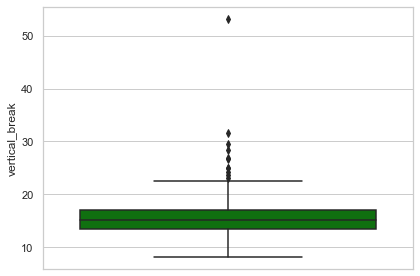

In [69]:
sns.boxplot(y=df['vertical_break'], color='green', orient='x')
plt.tight_layout()

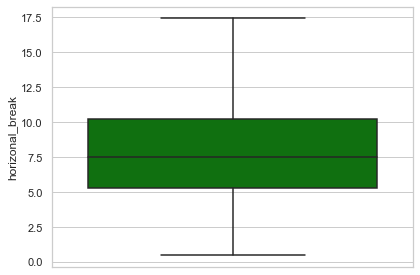

In [70]:
sns.boxplot(y=df['horizonal_break'], color='green', orient='x')
plt.tight_layout()

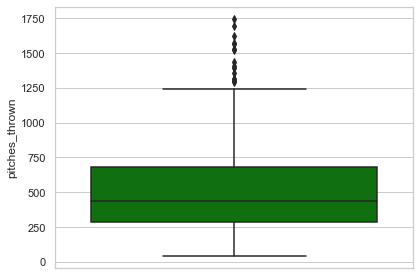

In [71]:
sns.boxplot(y=df['pitches_thrown'], color='green', orient='x')
plt.tight_layout()

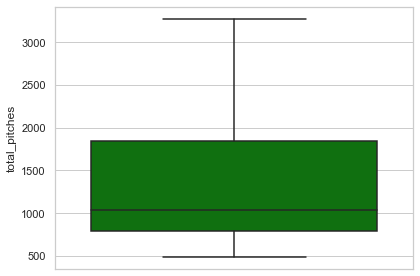

In [72]:
sns.boxplot(y=df['total_pitches'], color='green', orient='x')
plt.tight_layout()

In [74]:
#removing outlier for vertical break column
df.drop(df[df.vertical_break > 50].index, inplace=True)

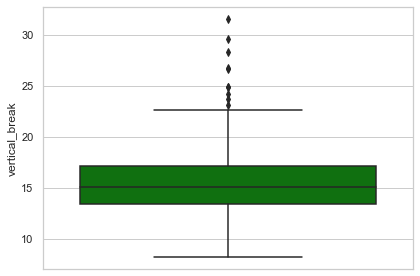

In [75]:
#redone boxplot for vertical break
sns.boxplot(y=df['vertical_break'], color='green', orient='x')
plt.tight_layout()

In [77]:
df.head()

,name,pitcher_id,team_name,pitch_hand,avg_speed,pitches_thrown,total_pitches,pitch_type,pitch_type_name,vertical_break,horizonal_break
0,Carlos Rodón,607074,SF,L,95.5,1749,2985,FF,4-Seamer,12.0,5.9
1,Gerrit Cole,543037,NYY,R,97.8,1698,3274,FF,4-Seamer,10.5,10.4
2,Logan Gilbert,669302,SEA,R,96.1,1625,3015,FF,4-Seamer,11.9,6.4
3,Nick Pivetta,601713,BOS,R,93.4,1572,3082,FF,4-Seamer,10.9,5.1
4,Triston McKenzie,663474,CLE,R,92.5,1565,2807,FF,4-Seamer,11.6,3.0
